## Titanic
- read file

In [425]:
from warnings import filterwarnings
filterwarnings("ignore")

In [426]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [427]:
path = r"D:\ML\train_titanic.xlsx"

In [428]:
df = pd.read_excel(path)

In [429]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Basic data quality check

In [430]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [431]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [433]:
n =df.isnull().sum()
n[n>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [434]:
df.duplicated().sum()

np.int64(0)

### Seperation of X and Y

In [435]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [436]:
x = df.drop(['PassengerId','Name' , 'Survived'], axis=1)
y = df['Survived']

In [437]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

## Sepration of cat and numerical data

In [438]:
cat = x.columns[x.dtypes=='object']
num = x.columns[x.dtypes!='object']

In [439]:
print(cat)
print()
print(num)

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [440]:
x.shape

(891, 9)

In [441]:
x.Cabin.value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [442]:
x.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [443]:
a = y.value_counts()
a

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

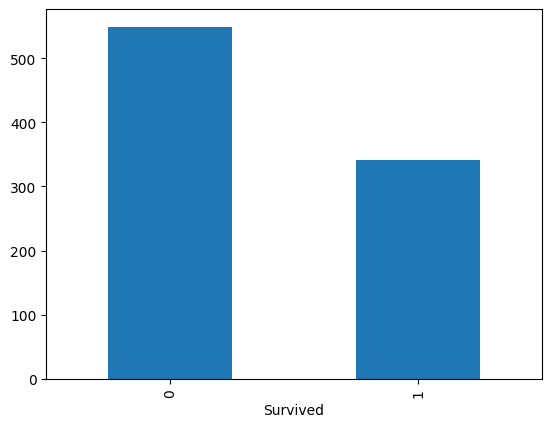

In [444]:
a.plot(kind='bar')


## Create Pipeline

In [445]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [446]:
cat_pipeline1 = Pipeline(steps=[('imputer' , SimpleImputer(strategy='most_frequent')),
                                ('encoder' , OrdinalEncoder())])

cat_pipeline2 = Pipeline(steps=[('imputer' , SimpleImputer(strategy='constant' , fill_value='Missing')),
                                ('encoder' , OrdinalEncoder())])

num_Pipeline = Pipeline(steps=[('imputer' , SimpleImputer(strategy='median')),
                           ('scaler' , StandardScaler())])

In [447]:
cat1 = ['Sex' ,'Ticket' , 'Embarked']
cat2 = ['Cabin']

## Compose all pipelines

In [448]:
pre = ColumnTransformer(transformers=[('cat1' , cat_pipeline1 , cat1),
                                     ('cat2' , cat_pipeline2 , cat2),   
                                     ('num' , num_Pipeline , num)])

In [449]:
pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [450]:
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

## we faced error messege of data type
- in cat column 'Ticket' some obsn are numerical
- we have to convert in str
- used below steps

In [451]:
x['Sex'].unique()

array(['male', 'female'], dtype=object)

In [452]:
x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [453]:
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [454]:

Ticket  =  np.array(x['Ticket'] , dtype = 'str')

In [455]:

Ticket

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

In [456]:

x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [457]:

x['Ticket'] = Ticket

In [458]:

x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [459]:

x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

## Apply to Data

In [460]:
x_scaled = pre.fit_transform(x)

In [461]:
x_scaled

array([[ 1.00000000e+00,  5.23000000e+02,  2.00000000e+00, ...,
         4.32793366e-01, -4.73673609e-01, -5.02445171e-01],
       [ 0.00000000e+00,  5.96000000e+02,  0.00000000e+00, ...,
         4.32793366e-01, -4.73673609e-01,  7.86845294e-01],
       [ 0.00000000e+00,  6.69000000e+02,  2.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.88854258e-01],
       ...,
       [ 0.00000000e+00,  6.75000000e+02,  2.00000000e+00, ...,
         4.32793366e-01,  2.00893337e+00, -1.76263239e-01],
       [ 1.00000000e+00,  8.00000000e+00,  0.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.43810379e-02],
       [ 1.00000000e+00,  4.66000000e+02,  1.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.92377828e-01]],
      shape=(891, 9))

In [462]:

x_scaled

array([[ 1.00000000e+00,  5.23000000e+02,  2.00000000e+00, ...,
         4.32793366e-01, -4.73673609e-01, -5.02445171e-01],
       [ 0.00000000e+00,  5.96000000e+02,  0.00000000e+00, ...,
         4.32793366e-01, -4.73673609e-01,  7.86845294e-01],
       [ 0.00000000e+00,  6.69000000e+02,  2.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.88854258e-01],
       ...,
       [ 0.00000000e+00,  6.75000000e+02,  2.00000000e+00, ...,
         4.32793366e-01,  2.00893337e+00, -1.76263239e-01],
       [ 1.00000000e+00,  8.00000000e+00,  0.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.43810379e-02],
       [ 1.00000000e+00,  4.66000000e+02,  1.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.92377828e-01]],
      shape=(891, 9))

In [463]:
##  male  , female 
1  ,  0  
0  , 1 

(0, 1)

In [464]:

#  convert  in dataframe
x_scaled =  pd.DataFrame(x_scaled)

In [465]:
x_scaled

,0,1,2,3,4,5,6,7,8
0,1.0,523.0,2.0,146.0,0.827377,-0.565736,0.432793,-0.473674,-0.502445
1,0.0,596.0,0.0,81.0,-1.566107,0.663861,0.432793,-0.473674,0.786845
2,0.0,669.0,2.0,146.0,0.827377,-0.258337,-0.474545,-0.473674,-0.488854
3,0.0,49.0,2.0,55.0,-1.566107,0.433312,0.432793,-0.473674,0.420730
4,1.0,472.0,2.0,146.0,0.827377,0.433312,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...
886,1.0,101.0,2.0,146.0,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671
887,0.0,14.0,2.0,30.0,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381
888,0.0,675.0,2.0,146.0,0.827377,-0.104637,0.432793,2.008933,-0.176263
889,1.0,8.0,0.0,60.0,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381


In [466]:

x.shape

(891, 9)

In [467]:
x_scaled.shape

(891, 9)

In [468]:
x_scaled.columns  =  pre.get_feature_names_out()

In [469]:

x_scaled.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,1.0,523.0,2.0,146.0,0.827377,-0.565736,0.432793,-0.473674,-0.502445
1,0.0,596.0,0.0,81.0,-1.566107,0.663861,0.432793,-0.473674,0.786845
2,0.0,669.0,2.0,146.0,0.827377,-0.258337,-0.474545,-0.473674,-0.488854
3,0.0,49.0,2.0,55.0,-1.566107,0.433312,0.432793,-0.473674,0.420730
4,1.0,472.0,2.0,146.0,0.827377,0.433312,-0.474545,-0.473674,-0.486337


## train test split

In [470]:
from  sklearn.model_selection import  train_test_split

In [471]:
x_train  ,  x_test  ,  y_train , y_test  =  train_test_split(x_scaled  ,  y ,  
                                            test_size  =  0.2  , 
                                             random_state  =  4)

In [472]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(712, 9) (712,)
(179, 9) (179,)


In [473]:

x_train.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
42,1.0,391.0,0.0,146.0,0.827377,-0.104637,-0.474545,-0.473674,-0.489442
684,1.0,240.0,2.0,146.0,-0.369365,2.354558,0.432793,0.767630,0.136831
605,1.0,396.0,2.0,146.0,0.827377,0.510161,0.432793,-0.473674,-0.335327
409,0.0,488.0,2.0,146.0,0.827377,-0.104637,2.247470,0.767630,-0.135658
740,1.0,82.0,2.0,105.0,-1.566107,-0.104637,-0.474545,-0.473674,-0.044381


In [474]:
x_test.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
646,1.0,373.0,2.0,146.0,0.827377,-0.796286,-0.474545,-0.473674,-0.489442
876,1.0,504.0,2.0,146.0,0.827377,-0.719436,-0.474545,-0.473674,-0.450180
359,0.0,285.0,1.0,146.0,0.827377,-0.104637,-0.474545,-0.473674,-0.489776
194,0.0,604.0,0.0,28.0,-1.566107,1.124960,-0.474545,-0.473674,-0.090272
819,1.0,337.0,2.0,146.0,0.827377,-1.487935,2.247470,2.008933,-0.086664


In [475]:

y_train.head()

42     0
684    0
605    0
409    0
740    1
Name: Survived, dtype: int64

In [476]:

y_test.head()

646    0
876    0
359    1
194    1
819    0
Name: Survived, dtype: int64

In [477]:

###  model  fitting 
from sklearn.ensemble import  RandomForestClassifier

In [478]:
RF  =  RandomForestClassifier(n_estimators  =  50  ,
                      n_jobs  =  -1 , max_depth  =  6   )

In [479]:
RF

,n_estimators,50
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [480]:

RF.fit(x_train  ,  y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [481]:
RF.score(x_train  ,  y_train)

0.8918539325842697

In [482]:
RF.score(x_test  , y_test)

0.8603351955307262

### Hyperparameter tunning technique

In [483]:
from sklearn.model_selection import GridSearchCV

In [484]:
para = {'n_estimators' : [50, 55 , 60 , 65 , 70 , 75],
        'criterion': ['gini' , 'entropy'],
        'max_depth' : [4, 15],}         

In [485]:
model = RandomForestClassifier()
RF_grcv = GridSearchCV(estimator=model, param_grid=para, 
                       cv=5, n_jobs=-1)     


In [486]:
RF_grcv.fit(x_train , y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [4, 15], 'n_estimators': [50, 55, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [487]:
RF_grcv.score(x_train , y_train)

0.9887640449438202

In [488]:
RF_grcv.score(x_test , y_test)

0.8770949720670391

In [489]:
from sklearn.metrics import classification_report , confusion_matrix

## Training evaluation

In [490]:
train_pred = RF_grcv.predict(x_train)
train_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,

In [491]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       430
           1       1.00      0.97      0.99       282

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712



In [492]:
cfm = confusion_matrix(y_train , train_pred)

<Axes: >

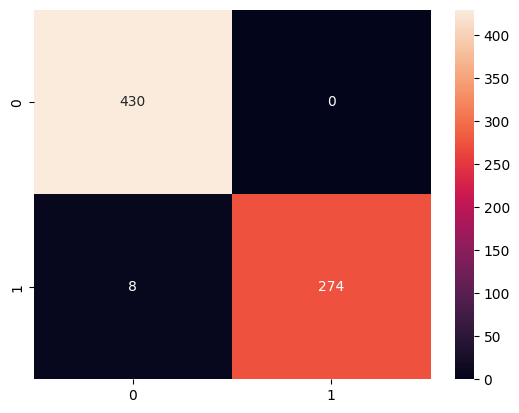

In [493]:
sns.heatmap(cfm  ,  annot  =  True  ,  fmt  =  'd' ,  xticklabels=True  , yticklabels=True)

## Testing evaluation

In [494]:
test_pred  =  RF_grcv.predict(x_test)

In [495]:
print(classification_report(y_test  ,  test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       119
           1       0.87      0.75      0.80        60

    accuracy                           0.88       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.88      0.88      0.87       179



In [496]:
cfm_test  =  confusion_matrix(y_test  , test_pred)

<Axes: >

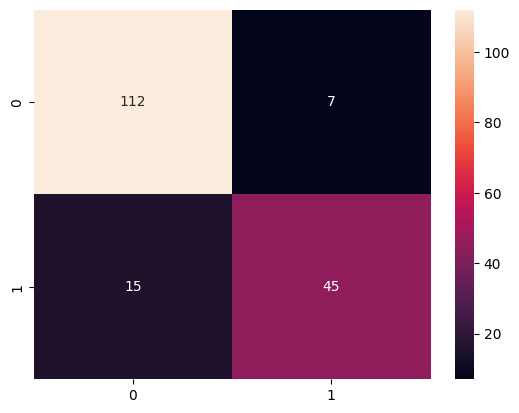

In [497]:
sns.heatmap(cfm_test , annot  = True  , xticklabels= True  , yticklabels=True  , fmt  =  'd')


## Model fitting on boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier( n_estimators= 100 , max_depth= 3
                                  )


In [499]:
gbc.fit(x_train , y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [500]:
gbc.score(x_test , y_test)

0.8379888268156425

In [501]:
gbc.score(x_train , y_train)

0.9157303370786517


## Evaluation

In [502]:
train_pred  = gbc.predict(x_train)
test_pred  =  gbc.predict(x_test)

In [503]:
print(classification_report(y_train  , train_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       430
           1       0.91      0.87      0.89       282

    accuracy                           0.92       712
   macro avg       0.92      0.91      0.91       712
weighted avg       0.92      0.92      0.92       712



In [504]:
cfm =  confusion_matrix(y_train  , train_pred)

<Axes: >

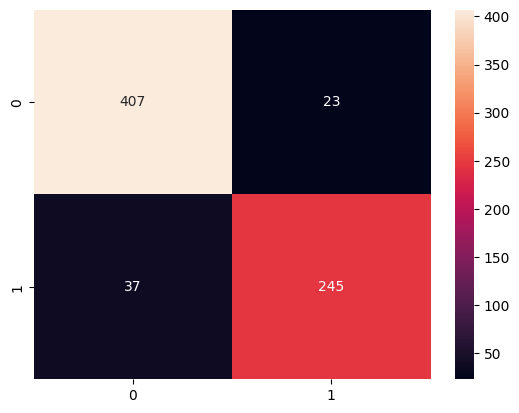

In [505]:
sns.heatmap(cfm , annot  = True  ,
             xticklabels= True  ,
               yticklabels=True  ,
                 fmt  =  'd')

In [506]:
print(classification_report(y_test  , test_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       119
           1       0.78      0.72      0.75        60

    accuracy                           0.84       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.84      0.84      0.84       179



<Axes: >

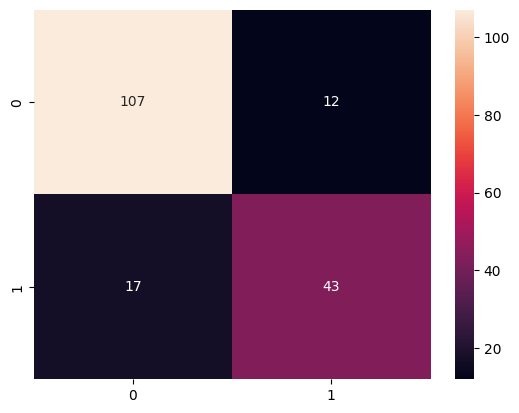

In [507]:
cfm_test  =  confusion_matrix(y_test  ,  test_pred)
sns.heatmap(cfm_test , annot  = True  , xticklabels= True  , yticklabels=True  , fmt  =  'd')

## XGB

In [508]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [509]:
from xgboost  import XGBClassifier
XGB  = XGBClassifier(n_estimators = 85  , max_depth  =  9  ,  n_jobs =-1)

In [510]:
XGB.fit(x_train  ,  y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [511]:
XGB.score(x_train ,  y_train)

0.9957865168539326

In [512]:

XGB.score(x_test  , y_test)

0.8491620111731844

- from above all models Extreme Gradient boosting is giving good performance we have to refer this model for future predictions

## Sample prediction

In [515]:

path  =  r"D:\ML\test_titanic.xlsx"

In [516]:
sample  =  pd.read_excel(path)

In [517]:
sample.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [518]:

pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [519]:

Ticket  =  np.array(sample['Ticket'] ,  dtype  =  'str')

In [520]:

sample['Ticket'] =  Ticket

In [521]:

sample_scaled  =  pre.fit_transform(sample)

In [522]:
sample_scaled

array([[ 1.00000000e+00,  1.52000000e+02,  1.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.97413332e-01],
       [ 0.00000000e+00,  2.21000000e+02,  2.00000000e+00, ...,
         6.16992373e-01, -4.00247702e-01, -5.12278007e-01],
       [ 1.00000000e+00,  7.30000000e+01,  1.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.64100469e-01],
       ...,
       [ 1.00000000e+00,  3.46000000e+02,  2.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -5.07796376e-01],
       [ 1.00000000e+00,  2.20000000e+02,  2.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.93455155e-01],
       [ 1.00000000e+00,  1.05000000e+02,  0.00000000e+00, ...,
         6.16992373e-01,  6.19895831e-01, -2.36957042e-01]],
      shape=(418, 9))

In [523]:

sample_scaled

array([[ 1.00000000e+00,  1.52000000e+02,  1.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.97413332e-01],
       [ 0.00000000e+00,  2.21000000e+02,  2.00000000e+00, ...,
         6.16992373e-01, -4.00247702e-01, -5.12278007e-01],
       [ 1.00000000e+00,  7.30000000e+01,  1.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.64100469e-01],
       ...,
       [ 1.00000000e+00,  3.46000000e+02,  2.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -5.07796376e-01],
       [ 1.00000000e+00,  2.20000000e+02,  2.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.93455155e-01],
       [ 1.00000000e+00,  1.05000000e+02,  0.00000000e+00, ...,
         6.16992373e-01,  6.19895831e-01, -2.36957042e-01]],
      shape=(418, 9))

In [524]:
sample_scaled =  pd.DataFrame(sample_scaled  ,  columns  =  pre.get_feature_names_out())

In [525]:
sample.shape

(418, 11)

In [526]:
x_train.shape
sample_scaled.shape

(418, 9)

In [527]:

sample_scaled.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,1.0,152.0,1.0,76.0,0.873482,0.386231,-0.499470,-0.400248,-0.497413
1,0.0,221.0,2.0,76.0,0.873482,1.371370,0.616992,-0.400248,-0.512278
2,1.0,73.0,1.0,76.0,-0.315819,2.553537,-0.499470,-0.400248,-0.464100
3,1.0,147.0,2.0,76.0,0.873482,-0.204852,-0.499470,-0.400248,-0.482475
4,0.0,138.0,2.0,76.0,0.873482,-0.598908,0.616992,0.619896,-0.417492


## predict target values

In [529]:
gbc.predict(sample_scaled)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,